<a href="https://colab.research.google.com/github/TWM-Sebastian-S/Deep-Learning-Using-H20-to-predict-Adult-Income/blob/main/Adult_Census_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income Census

## 1. Framing the Business Problem

**This is UCI Machine Learning Repository dataset. The following information has been extracted from https://archive.ics.uci.edu/ml/datasets/adult**


**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


**Attribute Information:**

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



The objective of this Jupyter notebook is to predict income using H2O Deep Learning.

## 2. Loading libraries and dataset

In [80]:
pip install h2o

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno  
import plotly.express as px
import h2o
from sklearn import preprocessing
from h2o.estimators import H2ODeepLearningEstimator
from h2o.grid import H2OGridSearch

h2o.init()
%matplotlib inline

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 35 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.5
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_vhr2rp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.11 final
--------------------------  ------------------------------------------------------------------

In [82]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
           'marital.status', 'occupation', 'relationship', 'race', 'sex',
           'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
           'income'
          ]
dataframe = pd.DataFrame()
df = pd.read_csv("adult.data", names=columns)
df.head(3)

age          workclass  fnlwgt  ... hours.per.week  native.country  income
0   39          State-gov   77516  ...             40   United-States   <=50K
1   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2   38            Private  215646  ...             40   United-States   <=50K

[3 rows x 15 columns]

## 3. Exploratory Data Analysis (EDA)

In [155]:
##basic stats
df.describe()

age        fnlwgt  ...  capital.loss  hours.per.week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     87.303830       40.437456
std       13.640433  1.055500e+05  ...    402.960219       12.347429
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178270e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.370510e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Comments**
- Workclass, education, marital.status, occupation, relationship, race, sex, native.country and income are object columns. Nothing that brought my attention in here. The atributes seems ok.

In [157]:
##understanding single vals in each col
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [158]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [159]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [160]:
df['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [161]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [162]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [163]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [164]:
df['native.country'].value_counts()

United-States    29753
Other             2808
Name: native.country, dtype: int64

In [165]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

**Comments**
- Income it's an object because it's the segmentation between more or less than 50k.
- Missing info has beet imputed as '?'.
- It seems to be some imbalance between the classes in the column "income".
- Male and Female are not 50/50. Could be due to the sample and the fact that it was more common to have men at work than women.

In [166]:
##counting the '?' in the dataframe
for col in list(df.columns):
    temp = len(df[df[col]=='?'].values)
    print(f'{col:{15}} {temp:.>{5}}')

age             ....0
workclass       ....0
fnlwgt          ....0
education       ....0
education.num   ....0
marital.status  ....0
occupation      ....0
relationship    ....0
race            ....0
sex             ....0
capital.gain    ....0
capital.loss    ....0
hours.per.week  ....0
native.country  ....0
income          ....0


In [167]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [168]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [169]:
##replacing the '?' by NaN.
df = df.replace('?', np.nan)

In [170]:
##missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [171]:
##assign NaN with most frequent values
df["workclass"]=df["workclass"].fillna("Private")
df["occupation"]=df["occupation"].fillna("Prof-specialty")
df["native.country"]=df["native.country"].fillna("United-States")

In [172]:
##rechecking
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 3.1 Univariate & Bi-Variate Analysis


In [173]:
##histogram of the relationship of income with age
fig = px.histogram(df, x="age", color = 'income',title="Relation from age to income (count)",nbins=100,barmode='overlay')
fig.show()

**Comments**
- It's logical to find more people with more income towards middle age.
- While people with less income has a lower probability of having more than 35/40 years old.

In [174]:
##histogram of occupation and working class
fig = px.histogram(df, x="workclass", color="occupation", title="Relation from workclass to occupation (count)",barmode='overlay')
fig.show()

In [175]:
##histogram of workclass and income
fig = px.histogram(df, x="workclass", color="income", title="Relation from workclass to income (percent)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- Never-worked and without-pay could possibly be no interesting for our analysis.

In [176]:
##histogram of the relation of different occupation to their ratios of earning more or less than 50k 
fig = px.histogram(df, x="occupation", color="income", title="Relation from occupation to income (count)",barmode='group')
fig.show()

**Comments**
- This shows that Adm-Clerical have the most difference between number of people in 2 earning labels.

In [177]:
##histogram of the relationship between percentage of people and their education 
fig = px.histogram(df, x="education.num", color="income", title="Relation from occupation to income (percentage)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- This shows that people who have higher education earn more as compared to other education groups.

In [178]:
##histogram of the relationship between the count of individuals with respect to education and their income
fig = px.histogram(df, x="education.num", color="income", title="Relation from occupation to income",barmode='overlay')
fig.show()

**Comments**
- '>=13' has highest percentage of rich and hence proves how higher education gives good returns.

In [179]:
##histogram of the relationship and marital status of the participants
fig = px.histogram(df, x="marital.status", color="relationship", title="Relation from marital status to relationship")
fig.show()

In [180]:
##histogram of marital status to Relationship with respect to percentage
fig = px.histogram(df, x="marital.status", color="relationship", title="Relation from marital status to relationship (percentage)",barmode='group',barnorm='percent')
fig.show()

In [181]:
##histogram of the relationship betwen marital status and the income 
fig = px.histogram(df, x="marital.status", color="income", title="Relation from marital status to income (count)")
fig.show()

**Comments**
- It shows that majority of high earning individuals are married.

In [182]:
##histogram of the relationship betwen marital status and income as percentages
fig = px.histogram(df, x="marital.status", color="income", title="Relation from marital status to income (percentage)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- There could be some problem in terms of class imbalances given that income is not 50/50.

In [183]:
##histogram of marital status to income as of percentage. 
fig = px.histogram(df, x="relationship", color="income", title="Relation from marital status to income (percentage)",barmode='group',barnorm='percent')
fig.show()

In [184]:
##histograms of marital status to income.
fig = px.histogram(df, x="relationship", color="income", title="Correlation from relation to income with each marital status (percentage)",barmode='group',barnorm='percent',facet_col_wrap=3,facet_col='marital.status',height=900,width=900)
fig.show()

In [185]:
##histogram of race and income.
fig = px.histogram(df, x="race", color="income", title="Relation from race to income (count)")
fig.show()

In [186]:
##histogram of race and income as a percentage of total   
fig = px.histogram(df, x="race", color="income", title="Relation of race and income (as percentage)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- Asian-Pac-Islander group has most percentage of rich individuals and white are 2nd in number

In [187]:
##histogram of relationship between the count of male and female and their income groups
fig = px.histogram(df, x="sex", color="income", title="Relation from sex to income (count)",barmode='group')
fig.show()

In [188]:
##histogram shows the relationship between the percentage of male and female and their income groups. 
fig = px.histogram(df, x="sex", color="income", title="Relation from sex to income (percentage)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- It looks from the above graph that men make more money than women. We should check class imbalances.

In [189]:
##histogram of the relationship of hours per week and income groups.
fig = px.histogram(df, x='hours.per.week', color="income", title="Relation from hours per week to income (count)")
fig.show()

**Comments**
- Most of the people work around 40 hours a week which is quite standard.
- People who works more hours a week, has a bigger proportion of people earning more than 50k a year.

In [190]:
##histogram of relationship between hours per week and income
fig = px.histogram(df, x='hours.per.week', color="income", title="Relation from hours per week to income (as a percentage)",barmode='group',barnorm='percent')
fig.show()

**Comments**
- It seems that people working any less than 40 hours a week earn very less in average.
- The range of people working 50-59 hours per week shows a very high percentage of high income individuals.
- You can see that people that works more has a higher percentage of people earning more than 50k. 
- 90-99 hours seems quite unreasonable for the level of earnings. Could be a mistake in the database, or maybe people lying about how much they work. Otherwise, those are probably not valuable jobs or people under exploided conditions.

In [191]:
##replacing all countries except US as "other"
countries = np.array(df['native.country'].unique())
countries = np.delete(countries, 0)
df['native.country'].replace(countries, 'Other', inplace=True)

In [192]:
##histogram showing relationship between countries as US/others and income 
fig = px.histogram(df, x='native.country', color="income", title="Relation from native country to income (count)")
fig.show()

In [193]:
##same histogram as a percentage 
fig = px.histogram(df, x='native.country', color="income", title="Relation from native country to income (percent)",barmode='group',barnorm='percent')
fig.show()

In [194]:
##graph of population distribution
fig = px.histogram(df, x='fnlwgt', title="the amount of population",nbins=20)
fig.show()

In [195]:
##histogram of population distribution split by income group
fig = px.histogram(df, x='fnlwgt', color="income", title="population",nbins=20,barmode='group',barnorm='percent')
fig.show()

### 3.2 Correlation

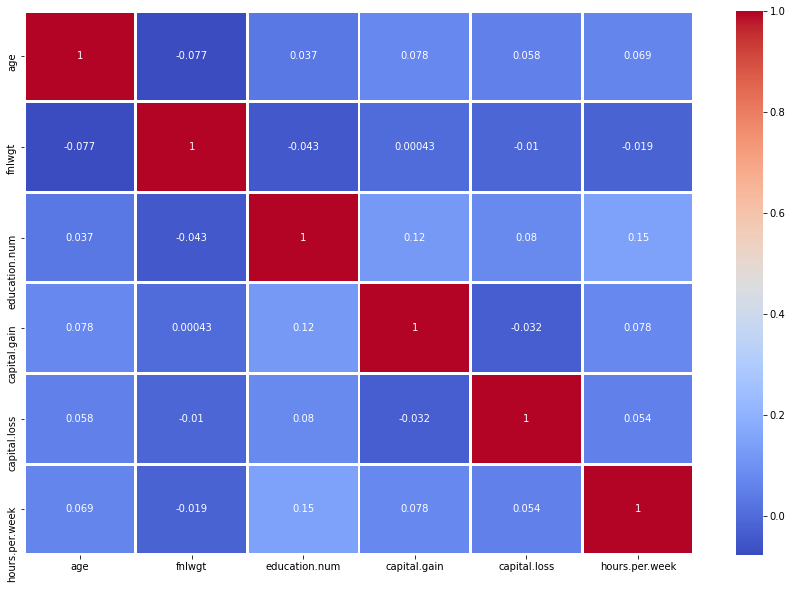

In [196]:
##correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

**Comments**
- Observing the correlation matrix, the firts thing that comes to us from a high level analysis is that no variable is highly correlated to another one.
- The highest correlation number is 15% that comes from education and hours per week. Quite reasonable.

## 4. Modeling using H2O

H2O is a Java-based software for data modeling and general computing. The H2O software is many things, but the primary purpose of H2O is as a distributed (many machines), parallel (many CPUs), in memory (several hundred GBs Xmx) processing engine.

There are two levels of parallelism:
- within node.
- across (or between) nodes.

The goal of H2O is to allow simple horizontal scaling to a given problem in order to produce a solution faster. The conceptual paradigm MapReduce (AKA “divide and conquer and combine”), along with a good concurrent application structure, (c.f. jsr166y and NonBlockingHashMap) enable this type of scaling in H2O. 

For application developers and data scientists, the gritty details of thread-safety, algorithm parallelism, and node coherence on a network are concealed by simple-to-use REST calls. In addition, H2O is an open-source project under the Apache v2 licence. All of the source code is on github.

H2O uses a distributed key-value store (the “DKV”) that contains pointers to the various objects of the H2O ecosystem.

Briefly, these objects are:
- Key: A key is an entry in the DKV that maps to an object in H2O.
- Frame: A Frame is a collection of Vec objects. It is a 2D array of elements.
- Vec: A Vec is a collection of Chunk objects. It is a 1D array of elements.
- Chunk: A Chunk holds a fraction of the BigData. It is a 1D array of elements.
- ModelMetrics: A collection of metrics for a given category of model.
- Model: A model is an immutable object having predict and metrics methods.
- Job: A Job is a non-blocking task that performs a finite amount of work.


In [125]:
columns = ['age', 'workclass', 'education', 'education.num',
           'marital.status', 'occupation', 'relationship', 'race', 'sex',
           'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
           'income'
          ]

**Comments**
- An H2OFrame is a 2D array of uniformly-typed columns. Data in H2O is compressed and is held in the JVM heap (i.e. data is “in memory”), and not in the python process local memory. The H2OFrame is an iterable (supporting list comprehensions).

In [126]:
hf = h2o.H2OFrame(df)
hf

Parse progress: |█████████████████████████████████████████████████████████| 100%


age workclass fnlwgt education education.num marital.status occupation relationship race sex capital.gain capital.loss hours.per.week native.country income 
 
 
 39 State-gov 77516 Bachelors 13 Never-married Adm-clerical Not-in-family White Male 2174 0 40 United-States <=50K 
 50 Self-emp-not-inc 83311 Bachelors 13 Married-civ-spouse Exec-managerial Husband White Male 0 0 13 United-States <=50K 
 38 Private 215646 HS-grad 9 Divorced Handlers-cleaners Not-in-family White Male 0 0 40 United-States <=50K 
 53 Private 234721 11th 7 Married-civ-spouse Handlers-cleaners Husband Black Male 0 0 40 United-States <=50K 
 28 Private 338409 Bachelors 13 Married-civ-spouse Prof-specialty Wife Black Female 0 0 40 Other <=50K 
 37 Private 284582 Masters 14 Married-civ-spouse Exec-managerial Wife White Female 0 0 40 United-States <=50K 
 49 Private 160187 9th 5 Married-spouse-absent Other-service Not-in-family Black Female 0 0 16 Other <=50K 
 52 Self-emp-not-inc 209642 HS-grad 9 Married-civ-spouse Exec-managerial Husband White Male 0 0 45 United-States >50K 
 31 Private 45781 Masters 14 Never-married Prof-specialty Not-in-family White Female 14084 0 50 United-States >50K 
 42 Private 159449 Bachelors 13 Married-civ-spouse Exec-managerial Husband White Male 5178 0 40 United-States >50K

In [127]:
income_data_train = hf

**Comments**
- Model building in this python module is influenced by both scikit-learn and the H2O R package. A section of the documentation is devoted to discussing the way to use the existing scikit-learn software with H2O-powered algorithms.
- Every model object inherits from the H2OEstimator from the h2o.estimators submodule. After an estimator has been specified and trained, it will additionally inherit methods to the following five model categories:
  * Regression
  * Binomial
  * Multinomial
  * Clustering
  * Autoencoder

In [128]:
income_data_train['education.num'] = income_data_train['education.num'].asfactor()
income_data_train['income'] = income_data_train['income'].asfactor()
income_data_train['sex'] = income_data_train['sex'].asfactor()

In [129]:
income_data_train.describe()

Rows:32561
Cols:15




age workclass fnlwgt education education.num marital.status occupation relationship race sex capital.gain capital.loss hours.per.week native.country income 
 
 
 type int enum int enum enum enum enum enum enum enum int int int enum enum 
 mins 17.0 12285.0 0.0 0.0 1.0 
 mean 38.581646755321145 189778.36651208595 1077.6488437087332 87.30382973495891 40.43745585209302 
 maxs 90.0 1484705.0 99999.0 4356.0 99.0 
 sigma 13.640432553581354 105549.97769702227 7385.29208484034 402.9602186489993 12.347428681731838 
 zeros 0 0 29849 31042 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 39.0 State-gov 77516.0 Bachelors 13 Never-married Adm-clerical Not-in-family White Male 2174.0 0.0 40.0 United-States <=50K 
 1 50.0 Self-emp-not-inc 83311.0 Bachelors 13 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 
 2 38.0 Private 215646.0 HS-grad 9 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 
 3 53.0 Private 234721.0 11th 7 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 
 4 28.0 Private 338409.0 Bachelors 13 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Other <=50K 
 5 37.0 Private 284582.0 Masters 14 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K 
 6 49.0 Private 160187.0 9th 5 Married-spouse-absent Other-service Not-in-family Black Female 0.0 0.0 16.0 Other <=50K 
 7 52.0 Self-emp-not-inc 209642.0 HS-grad 9 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 45.0 United-States >50K 
 8 31.0 Private 45781.0 Masters 14 Never-married Prof-specialty Not-in-family White Female 14084.0 0.0 50.0 United-States >50K 
 9 42.0 Private 159449.0 Bachelors 13 Married-civ-spouse Exec-managerial Husband White Male 5178.0 0.0 40.0 United-States >50K

In [130]:
train, valid = income_data_train.split_frame(ratios=[.8], seed=1234)

In [141]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [145]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

model_v1 = H2ODeepLearningEstimator(model_id="census_v1", epochs=50, variable_importances=True,
                                    hidden=[12], activation='tanh')
model_v1.train(columns, columns[-1], training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [146]:
acc_json = model_v1.accuracy(train=True, valid=True)

acc = {x:acc_json[x][0] for x in acc_json}

In [147]:
f1_json = model_v1.F1(train=True, valid=True)

f1 = {x:f1_json[x][0] for x in f1_json}

pd.DataFrame(f1)

train     valid
0  0.357613  0.365506
1  0.703606  0.706383

**Comments**
- From the above points, accuracy is not the best metric for classifying the data as it is skewed.

## 5. Performance

In [148]:
auc = model_v1.auc(train=True, valid=True)

In [149]:
auc

{'train': 0.9168454102898709, 'valid': 0.9138301565103606}

## 6. Hyperparameter Tunning

**General Concepts**

- The hyperparameters to tune are the number of neurons, activation function, optimizer, learning rate, batch size, and epochs. The second step is to tune the number of layers. This is what other conventional algorithms do not have. Different layers can affect the accuracy.
- Number of epochs is the number of times the whole training data is shown to the network while training. Increase the number of epochs until the validation accuracy starts decreasing even when training accuracy is increasing(overfitting).
- Keep adding layers until the test error does not improve anymore.
- An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

In [150]:
hyper_parameters = {
   'epochs': [10, 20, 30],
   'activation': [
       'tanh',
       'rectifier',
       'maxout'
   ],
   'hidden': [[100, 100], [200, 200], [300, 300]],
}

dn_mode = H2OGridSearch(
   model=H2ODeepLearningEstimator(adaptive_rate=True, shuffle_training_data=True),
   grid_id='DeepLearning',
   hyper_params=hyper_parameters,
)
dn_mode.train(x=columns, y=columns[-1],
               training_frame=train,
               validation_frame=valid,
)
dn_mode.get_grid(sort_by='auc', decreasing=True)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%
     activation epochs      hidden              model_ids                 auc
0          Tanh   20.0  [100, 100]   DeepLearning_model_4  0.9148972332358156
1          Tanh   30.0  [100, 100]   DeepLearning_model_7  0.9147772404047375
2          Tanh   10.0  [200, 200]  DeepLearning_model_10  0.9138657346179652
3          Tanh   10.0  [100, 100]   DeepLearning_model_1  0.9135498623180536
4          Tanh   20.0  [300, 300]  DeepLearning_model_22  0.9123391406487874
5          Tanh   30.0  [300, 300]  DeepLearning_model_25  0.9122906371612667
6        Maxout   30.0  [200, 200]  DeepLearning_model_18  0.9121439940623204
7     Rectifier   30.0  [200, 200]  DeepLearning_model_17   0.911858702944788
8          Tanh   10.0  [300, 300]  DeepLearning_model_19  0.9118195270510212
9        Maxout   10.0  [300, 300]  DeepLearning_model_21  0.9111443425145727
10    Rectifier   10.0  [100, 100]   DeepLearning_model_2  0.

In [152]:
dn_mode.get_grid(sort_by='f1', decreasing=True)

     activation epochs      hidden              model_ids                  f1
0          Tanh   20.0  [100, 100]   DeepLearning_model_4  0.7113337507827178
1     Rectifier   30.0  [100, 100]   DeepLearning_model_8   0.708452041785375
2          Tanh   10.0  [200, 200]  DeepLearning_model_10   0.707936507936508
3     Rectifier   30.0  [200, 200]  DeepLearning_model_17  0.7074788902291919
4          Tanh   30.0  [100, 100]   DeepLearning_model_7            0.706875
5     Rectifier   10.0  [200, 200]  DeepLearning_model_11  0.7058100215185983
6        Maxout   10.0  [300, 300]  DeepLearning_model_21  0.7056661562021439
7        Maxout   30.0  [200, 200]  DeepLearning_model_18  0.7049689440993789
8     Rectifier   10.0  [300, 300]  DeepLearning_model_20  0.7046902142443544
9          Tanh   30.0  [300, 300]  DeepLearning_model_25  0.7033240136688412
10       Maxout   10.0  [200, 200]  DeepLearning_model_12  0.7030864197530864
11       Maxout   30.0  [300, 300]  DeepLearning_model_27  0.702

**Comments**
- Since this is a  classification Problem , metrics such as logloss and MSE doesn't matter much. So we used 2 metrics i.e AUC and f1 score. It was found that 2 models : 'model 4' and 'model 7' were found to be highly accurate and their difference in accuracies are very minimal. So we are going with DeepLearning_model_4 

In [153]:
best_dl_model = dn_mode.models[0]

In [154]:
h2o.save_model(best_dl_model, force=True)

'/content/DeepLearning_model_7'